<a href="https://colab.research.google.com/github/ghanbarzadeh/Course_MachineVision_2021/blob/master/CHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [4]:
!wget https://web.stanford.edu/class/cs315b/images/gates.png

--2021-10-18 15:31:03--  https://web.stanford.edu/class/cs315b/images/gates.png
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144491 (141K) [image/png]
Saving to: ‘gates.png.1’

gates.png.1         100%[===================>] 141.10K   410KB/s    in 0.3s    

2021-10-18 15:31:05 (410 KB/s) - ‘gates.png.1’ saved [144491/144491]



In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

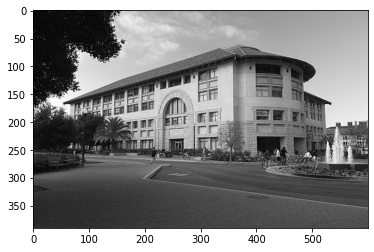

In [6]:
img = cv2.imread('/content/gates.png', cv2.IMREAD_GRAYSCALE)
h, w = img.shape
plt.imshow(img, cmap="gray")
plt.show()

# Smoothing

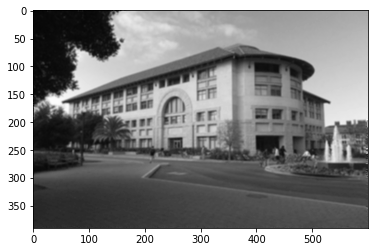

True

In [7]:
def smooth_image(image):
    kernel = np.array([[2, 4, 5, 4, 2], 
                       [4, 9, 12 ,9, 4], 
                       [5, 12, 15, 12, 5], 
                       [4, 9, 12, 9, 4], 
                       [2, 4, 5, 4, 2]]) / 159.0
    new_image = np.array(image)
    for x in range(2, h-4):
        for y in range(2, w-4):
            new_image[x, y] = np.sum(image[x:x+5, y:y+5] * kernel)
    return new_image

smoothed_image = smooth_image(img)

plt.imshow(smoothed_image, cmap="gray")
plt.show()

cv2.imwrite("smoothed_image.png", smoothed_image)

# Gradient Calculation

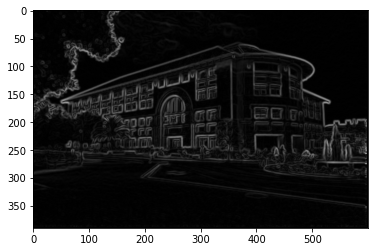

True

In [8]:
def calc_gradient(image):
    Gx_kernel = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])
    Gy_kernel = np.array([[-1, -2, -1], 
                          [0, 0, 0], 
                          [1, 2, 1]])
    new_image = np.zeros((h, w))
    for x in range(1, h-2):
        for y in range(1, w-2):
            Gx = np.sum(image[x:x+3, y:y+3] * Gx_kernel)
            Gy = np.sum(image[x:x+3, y:y+3] * Gy_kernel)
            new_image[x, y] = np.sqrt(Gx**2 + Gy**2)
    return new_image

image_gradient = calc_gradient(smoothed_image)

plt.imshow(image_gradient, cmap="gray")
plt.show()

cv2.imwrite("image_gradient.png", image_gradient)

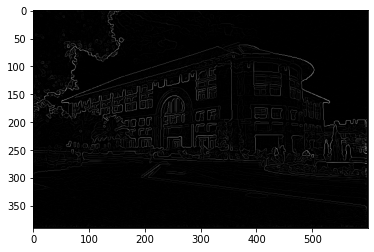

True

In [40]:
def NMS(image):
    Gx_kernel = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])
    Gy_kernel = np.array([[-1, -2, -1], 
                          [0, 0, 0], 
                          [1, 2, 1]])
    Gx = np.zeros((h, w))
    Gy = np.zeros((h, w))
    for x in range(1, h-2):
        for y in range(1, w-2):
            Gx[x, y] = np.sum(image[x:x+3, y:y+3] * Gx_kernel)
            Gy[x, y] = np.sum(image[x:x+3, y:y+3] * Gy_kernel)
    gradient_magnitude = np.sqrt(Gx**2 + Gy**2)
    gradient_dir = np.mod(np.round(np.arctan2(Gy, Gx)*180/np.pi/45)*45, 180)
    # Pad the gradient magnitude to accompany edge cases
    padded_gradient = np.zeros((h+2, w+2))
    padded_gradient[1:-1,1:-1] = gradient_magnitude[:,:]
    # NMS
    NMS_image = np.zeros((h, w))
    for x in range(h):
        for y in range(w):
            if gradient_dir[x, y] == 0:
                if gradient_magnitude[x, y] > padded_gradient[x+1, y] and \
                    gradient_magnitude[x, y] > padded_gradient[x+1, y+2]:
                    NMS_image[x, y] = gradient_magnitude[x, y]
            if gradient_dir[x, y] == 45:
                if gradient_magnitude[x, y] > padded_gradient[x, y] and \
                    gradient_magnitude[x, y] > padded_gradient[x+2, y+2]:
                    NMS_image[x, y] = gradient_magnitude[x, y]
            if gradient_dir[x, y] == 90:
                if gradient_magnitude[x, y] > padded_gradient[x, y+1] and \
                    gradient_magnitude[x, y] > padded_gradient[x+2, y+1]:
                    NMS_image[x, y] = gradient_magnitude[x, y]
            if gradient_dir[x, y] == 135:
                if gradient_magnitude[x, y] > padded_gradient[x+2, y] and \
                    gradient_magnitude[x, y] > padded_gradient[x, y+2]:
                    NMS_image[x, y] = gradient_magnitude[x, y]
    return NMS_image

image_NMS = NMS(smoothed_image)

plt.imshow(image_NMS, cmap="gray")
plt.show()

cv2.imwrite("image_NMS.png", image_NMS)

# Thresholding

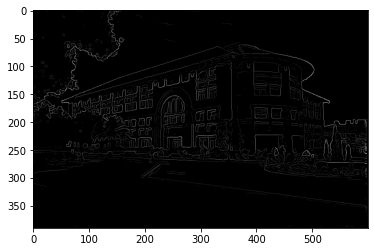

True

In [17]:
def thresholding(image):
    threshold = 50
    new_image = np.array(image)
    new_image[image<threshold] = 0
    return new_image

image_threshold = thresholding(image_NMS)

plt.imshow(image_threshold, cmap="gray")
plt.show()

cv2.imwrite("image_threshold.png", image_threshold)

# Bonus Section

## NMS with linear interpolation

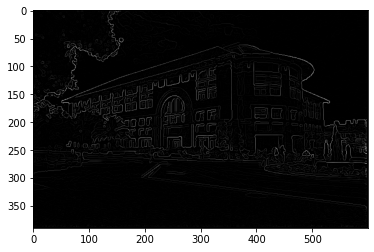

True

In [41]:
def NMS_bonus(image):
    Gx_kernel = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])
    Gy_kernel = np.array([[-1, -2, -1], 
                          [0, 0, 0], 
                          [1, 2, 1]])
    Gx = np.zeros((h, w))
    Gy = np.zeros((h, w))
    for x in range(1, h-2):
        for y in range(1, w-2):
            Gx[x, y] = np.sum(image[x:x+3, y:y+3] * Gx_kernel)
            Gy[x, y] = np.sum(image[x:x+3, y:y+3] * Gy_kernel)
    gradient_magnitude = np.sqrt(Gx**2 + Gy**2)
    gradient_dir = np.mod(np.arctan2(Gy, Gx), np.pi)
    # Pad the gradient magnitude to compensate for edge cases
    padded_gradient = np.zeros((h+2, w+2))
    padded_gradient[1:-1,1:-1] = gradient_magnitude[:,:]
    # NMS
    NMS_image = np.zeros((h, w))
    for x in range(h):
        for y in range(w):
            if (gradient_dir[x, y]>=0 and gradient_dir[x, y]<np.pi/4):
                p1 = np.tan(gradient_dir[x, y])*padded_gradient[x+2, y+2] + \
                    (1-np.tan(gradient_dir[x, y]))*padded_gradient[x+1, y+2]
                p2 = np.tan(gradient_dir[x, y])*padded_gradient[x, y] + \
                    (1-np.tan(gradient_dir[x, y]))*padded_gradient[x+1, y]
                if gradient_magnitude[x, y] > p1 and gradient_magnitude[x, y] > p2:
                    NMS_image[x, y] = gradient_magnitude[x, y]
            if (gradient_dir[x, y]>=np.pi/4 and gradient_dir[x, y]<np.pi/2):
                p1 = np.tan((np.pi/2-gradient_dir[x, y]))*padded_gradient[x+2, y+2] + \
                    (1-np.tan((np.pi/2-gradient_dir[x, y])))*padded_gradient[x+2, y+1]
                p2 = np.tan((np.pi/2-gradient_dir[x, y]))*padded_gradient[x, y] + \
                    (1-np.tan((np.pi/2-gradient_dir[x, y])))*padded_gradient[x, y+1]
                if gradient_magnitude[x, y] > p1 and gradient_magnitude[x, y] > p2:
                    NMS_image[x, y] = gradient_magnitude[x, y]
            if (gradient_dir[x, y]>=np.pi/2 and gradient_dir[x, y]<np.pi*3/4):
                p1 = np.tan((gradient_dir[x, y]-np.pi/2))*padded_gradient[x+2, y] + \
                    (1-np.tan((gradient_dir[x, y]-np.pi/2)))*padded_gradient[x+2, y+1]
                p2 = np.tan((gradient_dir[x, y]-np.pi/2))*padded_gradient[x, y+2] + \
                    (1-np.tan((gradient_dir[x, y]-np.pi/2)))*padded_gradient[x, y+1]
                if gradient_magnitude[x, y] > p1 and gradient_magnitude[x, y] > p2:
                    NMS_image[x, y] = gradient_magnitude[x, y]
            if (gradient_dir[x, y]>=np.pi*3/4 and gradient_dir[x, y]<=np.pi):
                p1 = np.tan((np.pi-gradient_dir[x, y]))*padded_gradient[x+2, y] + \
                    (1-np.tan((np.pi-gradient_dir[x, y])))*padded_gradient[x+1, y]
                p2 = np.tan((np.pi-gradient_dir[x, y]))*padded_gradient[x, y+2] + \
                    (1-np.tan((np.pi-gradient_dir[x, y])))*padded_gradient[x+1, y+2]
                if gradient_magnitude[x, y] > p1 and gradient_magnitude[x, y] > p2:
                    NMS_image[x, y] = gradient_magnitude[x, y]
    return NMS_image

image_NMS_bonus = NMS_bonus(smoothed_image)

plt.imshow(image_NMS_bonus, cmap="gray")
plt.show()

cv2.imwrite("image_NMS_bonus.png", image_NMS_bonus)

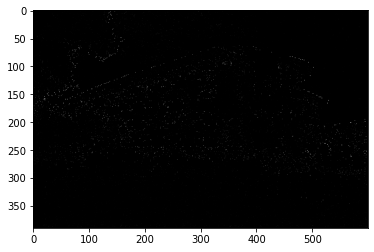

True

In [43]:
NMS_compare = np.abs(image_NMS_bonus-image_NMS)

plt.imshow(NMS_compare, cmap="gray")
plt.show()

cv2.imwrite("NMS_compare.png", NMS_compare)

In [50]:
print(np.sum(NMS_compare>0))
print(np.sum(image_NMS_bonus>0))
print(np.sum(image_NMS>0))
print(np.sum(image_gradient>0))

8692
60947
60517
225894


## Double thresholding

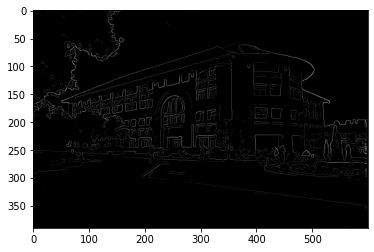

True

In [82]:
def hystersis_thresholding(image):
    Th = 75
    Tl = Th/2
    new_image = np.zeros((h, w))
    new_image[image>Th] = image[image>Th]
    # Pad the strong mask to compensate for edge cases
    strong_mask = np.full((h+2, w+2), False)
    strong_mask[1:-1,1:-1] = image>Th
    weak_mask = np.logical_and(image<=Th, image>=Tl)    
    for x in range(h):
        for y in range(w):
            if weak_mask[x, y]:
                if np.any(strong_mask[x:x+3, y:y+3]):
                    new_image[x, y] = image[x, y]
    return new_image

image_hystersis_thresholding = hystersis_thresholding(image_NMS)

plt.imshow(image_hystersis_thresholding, cmap="gray")
plt.show()

cv2.imwrite("image_hystersis_thresholding.png", image_hystersis_thresholding)